In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [4]:
df=pd.read_csv('covid-19(India).csv')
data=df.groupby(['Date'])['Infected'].agg(np.sum).reset_index()
data['confirmed']=data['Infected'].cumsum()
data

,Date,Infected,confirmed
0,02-03-2020,2,2
1,03-02-2020,3,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
5,06-03-2020,2,30
6,07-03-2020,3,33
7,08-03-2020,5,38
8,09-03-2020,7,45
9,10-03-2020,11,56


In [5]:
data['days']=np.arange(0, len(data), 1)
data=data[['days', 'confirmed']]
data

,days,confirmed
0,0,2
1,1,5
2,2,7
3,3,27
4,4,28
5,5,30
6,6,33
7,7,38
8,8,45
9,9,56


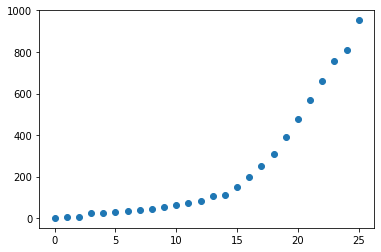

In [6]:

plt.scatter(data['days'], data['confirmed'])


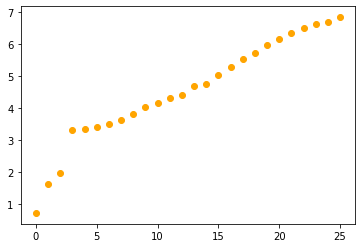

In [7]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [8]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

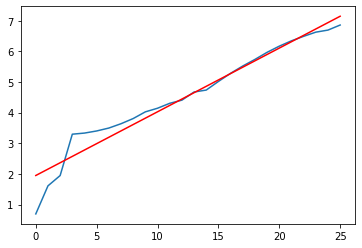

In [9]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

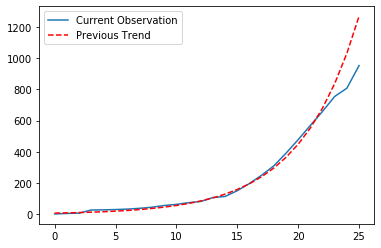

In [10]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [18]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.9478619746216219

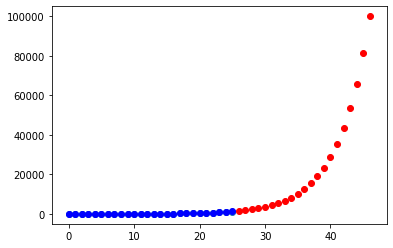

In [19]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [20]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46]),
 array([[  1562.69024636],
        [  1923.90146275],
        [  2368.60558066],
        [  2916.10173669],
        [  3590.15000562],
        [  4420.00253307],
        [  5441.67301136],
        [  6699.49959101],
        [  8248.06905455],
        [ 10154.58575741],
        [ 12501.78814248],
        [ 15391.53939839],
        [ 18949.24808774],
        [ 23329.31059047],
        [ 28721.81155193],
        [ 35360.77311953],
        [ 43534.31096607],
        [ 53597.13784776],
        [ 65985.9573225 ],
        [ 81238.4156806 ],
        [100016.43455801]]))

In [21]:
dt=df.groupby(['Date'])['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
dt=dt.iloc[4:]
dt

,Date,Infected,confirmed
4,05-03-2020,1,28
5,06-03-2020,2,30
6,07-03-2020,3,33
7,08-03-2020,5,38
8,09-03-2020,7,45
9,10-03-2020,11,56
10,11-03-2020,7,63
11,12-03-2020,11,74
12,13-03-2020,8,82
13,15-03-2020,25,107


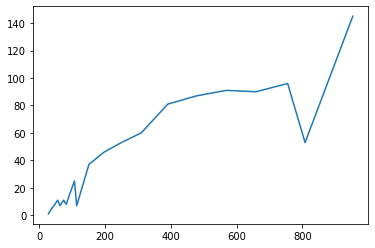

In [22]:
plt.plot(dt['confirmed'],dt['Infected'])